In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm.autonotebook import tqdm
from joblib import Parallel, delayed
import umap
import pandas as pd

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [3]:
from avgn.utils.paths import DATA_DIR, most_recent_subdirectory, ensure_dir

In [4]:
DATASET_ID = 'batsong'

In [5]:
from avgn.utils.hparams import HParams
from avgn.dataset import DataSet

In [6]:
from avgn.signalprocessing.create_spectrogram_dataset import prepare_wav, create_label_df, get_row_audio

### create dataset

In [51]:
hparams = HParams(
    num_mel_bins = 32,
    mel_lower_edge_hertz=500,
    mel_upper_edge_hertz=120000,
    butter_lowcut = 500,
    butter_highcut = 120000,
    ref_level_db = 20,
    min_level_db = -60,
    mask_spec = True,
    win_length_ms = 0.5,
    hop_length_ms = 0.05,
    mask_spec_kwargs = {"spec_thresh": 0.9, "offset": 1e-10},
    n_jobs = -1,
    verbosity=1,
    nex = 10
)

In [52]:
# create a dataset object
dataset = DataSet(DATASET_ID, hparams = hparams)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished


In [53]:
# dataset.data_files = {i:dataset.data_files[i] for i in list(dataset.data_files.keys())[:5]}

In [54]:
dataset.sample_json

OrderedDict([('fid', 253810),
             ('Treatment ID', 17),
             ('Recording channel', 1),
             ('Recording time', '2013-05-06 07:03:32'),
             ('indvs',
              OrderedDict([('210',
                            OrderedDict([('syllables',
                                          OrderedDict([('start_times',
                                                        [4e-06]),
                                                       ('end_times',
                                                        [1.314112]),
                                                       ('addressee', [207]),
                                                       ('context',
                                                        ['General']),
                                                       ('emit_prevoc_act',
                                                        [2]),
                                                       ('add_prevoc_act', [2]),
                     

In [55]:
len(dataset.data_files)

10

#### Create dataset based upon JSON

In [12]:
from joblib import Parallel, delayed
n_jobs = -1; verbosity = 10

In [13]:
with Parallel(n_jobs=n_jobs, verbose=verbosity) as parallel:
    syllable_dfs = parallel(
        delayed(create_label_df)(
            dataset.data_files[key].data,
            hparams=dataset.hparams,
            labels_to_retain=["context"],
            unit="syllables",
            dict_features_to_retain = [],
            key = key,
        )
        for key in tqdm(dataset.data_files.keys())
    )
syllable_df = pd.concat(syllable_dfs)
len(syllable_df)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  65 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1996s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  80 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 114 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1426s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done 148 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 186 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 242 tasks      | elapsed:    1.8s
[Parallel(n_j

[Parallel(n_jobs=-1)]: Done 36350 tasks      | elapsed:   57.2s
[Parallel(n_jobs=-1)]: Done 36898 tasks      | elapsed:   58.0s
[Parallel(n_jobs=-1)]: Done 37446 tasks      | elapsed:   58.8s
[Parallel(n_jobs=-1)]: Done 38002 tasks      | elapsed:   59.6s
[Parallel(n_jobs=-1)]: Done 38558 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 39122 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 39686 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 40258 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 40830 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 41410 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 41990 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 42578 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 43166 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 43762 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 44358 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 44962 tasks 

[Parallel(n_jobs=-1)]: Done 83884 out of 83884 | elapsed:  2.2min finished


86867

In [14]:
syllable_df[:3]

,start_time,end_time,context,indv,indvi,key
0,0.000004,1.314112,General,210,0,130506064422924720
0,0.000004,2.133312,Sleeping,-216,0,130126055734753855
0,0.000004,1.314112,Sleeping,207,0,130529075332772067


In [15]:
syllable_df.context.unique()

array(['General', 'Sleeping', 'Biting', 'Isolation', 'Feeding',
       'Mating protest', 'Fighting', 'Grooming', 'Kissing', 'Separation',
       'Unknown', 'Threat-like', 'Landing'], dtype=object)

In [16]:
# get only isolation calls
syllable_df = syllable_df[syllable_df.context == "Isolation"]

### get audio for dataset

In [17]:
with Parallel(n_jobs=n_jobs, verbose=verbosity) as parallel:
    syllable_dfs = parallel(
        delayed(get_row_audio)(
            syllable_df[syllable_df.key == key], 
            dataset.data_files[key].data['wav_loc'], 
            dataset.hparams
        )
        for key in tqdm(syllable_df.key.unique())
    )
syllable_df = pd.concat(syllable_dfs)
len(syllable_df)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  65 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  80 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 114 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 133 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 152 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 194 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 217 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 240 tasks      | elapsed:  

[Parallel(n_jobs=-1)]: Done 5632 out of 5632 | elapsed:  1.6min finished


5681

In [18]:
df_mask  = np.array([len(i) > 0 for i in tqdm(syllable_df.audio.values)])

In [19]:
syllable_df = syllable_df[np.array(df_mask)]

In [20]:
syllable_df[:3]

,start_time,end_time,context,indv,indvi,key,audio,rate
0,0.000004,2.231616,Isolation,0,0,121202234934171138,"[0.00021063547800872386, 0.0001627990693820472...",250000
0,0.912780,2.100544,Isolation,0,0,120717011305685619,"[-1.6845749088512945e-05, 0.000183535147472987...",250000
0,0.000004,2.886976,Isolation,0,0,121122011905590119,"[0.00010221735009936458, 0.0005975149564042161...",250000


In [21]:
sylls = syllable_df.audio.values

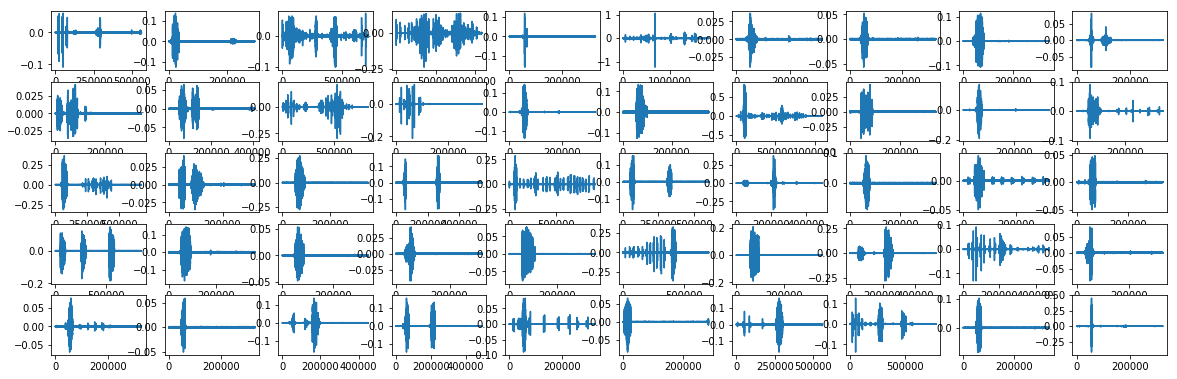

In [22]:
nrows = 5
ncols = 10
zoom = 2
fig, axs = plt.subplots(ncols=ncols, nrows = nrows,figsize = (ncols*zoom, nrows+zoom/1.5))
for i, syll in tqdm(enumerate(sylls), total = nrows*ncols):
    ax = axs.flatten()[i]
    ax.plot(syll)
    if i == nrows*ncols -1:
        break

In [23]:
syllable_df['audio'] = [i/np.max(i) for i in tqdm(syllable_df.audio.values)]

In [64]:
sylls = syllable_df.audio.values
max_vals = [np.argmax(np.abs(i)) for i in syllable_df['audio'].values]

In [71]:
pad = int(dataset.sample_json['samplerate_hz']*.1)
pad

25000

50000 557903 50175
0 296941 22734
50000 721743 445490
50000 1082191 355202
50000 328527 59409
50000 1811279 680121
50000 320335 51511
50000 328527 53116
50000 344911 69379
50000 320335 54670
50000 344911 79985
50000 410447 71650
50000 828239 528522
50000 328527 63575
50000 328527 57596
50000 353103 63520
50000 1098575 100343
50000 344911 80109
50000 336719 62624
50000 353103 54847
50000 672591 69966
50000 320335 55653
50000 361295 72288
50000 541519 59984
50000 926543 63299
50000 607055 68577
50000 492367 212710
50000 344911 65005
50000 328527 57504
50000 336719 60546
50000 852815 543101
50000 361295 65776
50000 336719 59791
50000 320335 56690
50000 361295 72403
50000 705359 411708
50000 361295 70784
50000 525135 214910
50000 475983 55430
50000 328527 50183
50000 328527 59358
50000 328527 62070
50000 451407 165550
50000 492367 60914
50000 328527 54348
0 285823 15786
50000 557033 276563
50000 779087 52629
50000 336719 61990
50000 320335 54823


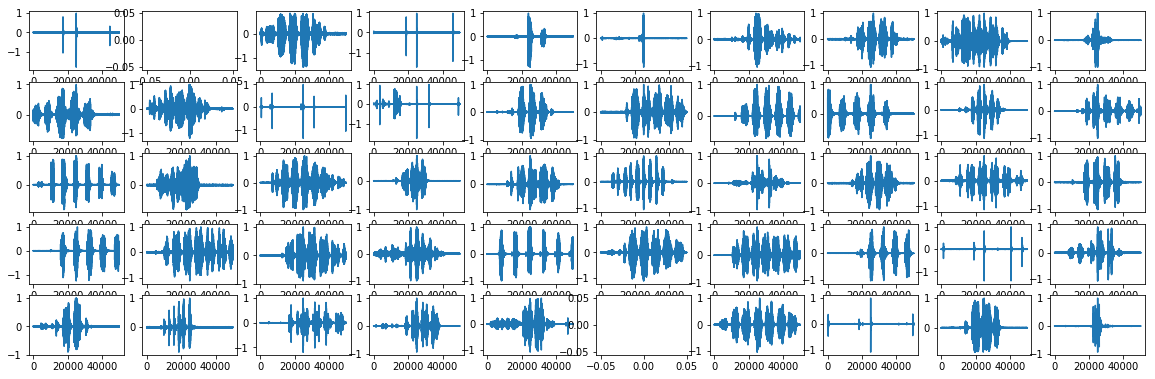

In [72]:
nrows = 5
ncols = 10
zoom = 2
fig, axs = plt.subplots(ncols=ncols, nrows = nrows,figsize = (ncols*zoom, nrows+zoom/1.5))
for i, syll in tqdm(enumerate(sylls), total = nrows*ncols):
    ax = axs.flatten()[i]
    mid = np.argmax(np.abs(syll))
    middle = syll[mid-pad:mid+pad]
    print(len(middle), len(syll), mid)
    ax.plot(middle)
    if i == nrows*ncols -1:
        break

In [85]:
from avgn.signalprocessing.spectrogramming import spectrogram
from avgn.visualization.spectrogram import plot_spec

In [102]:
syll = sylls[10]

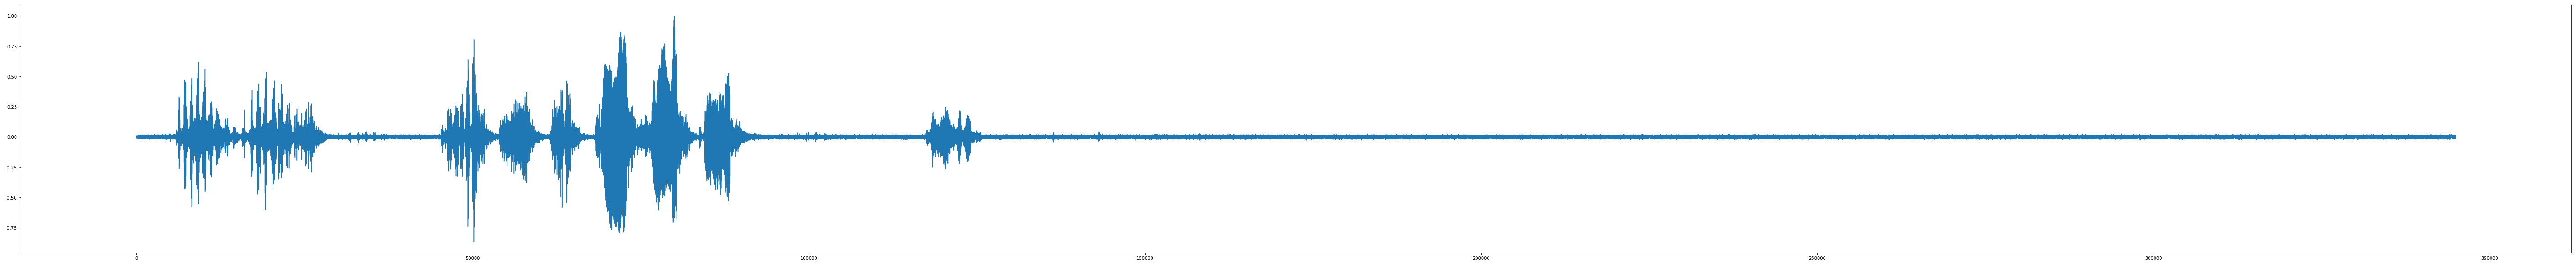

In [103]:
fig, ax = plt.subplots(figsize=(100,10))
ax.plot(syll)

In [104]:
rate= dataset.sample_json['samplerate_hz']

In [105]:
spec = spectrogram(syll, rate, hparams)

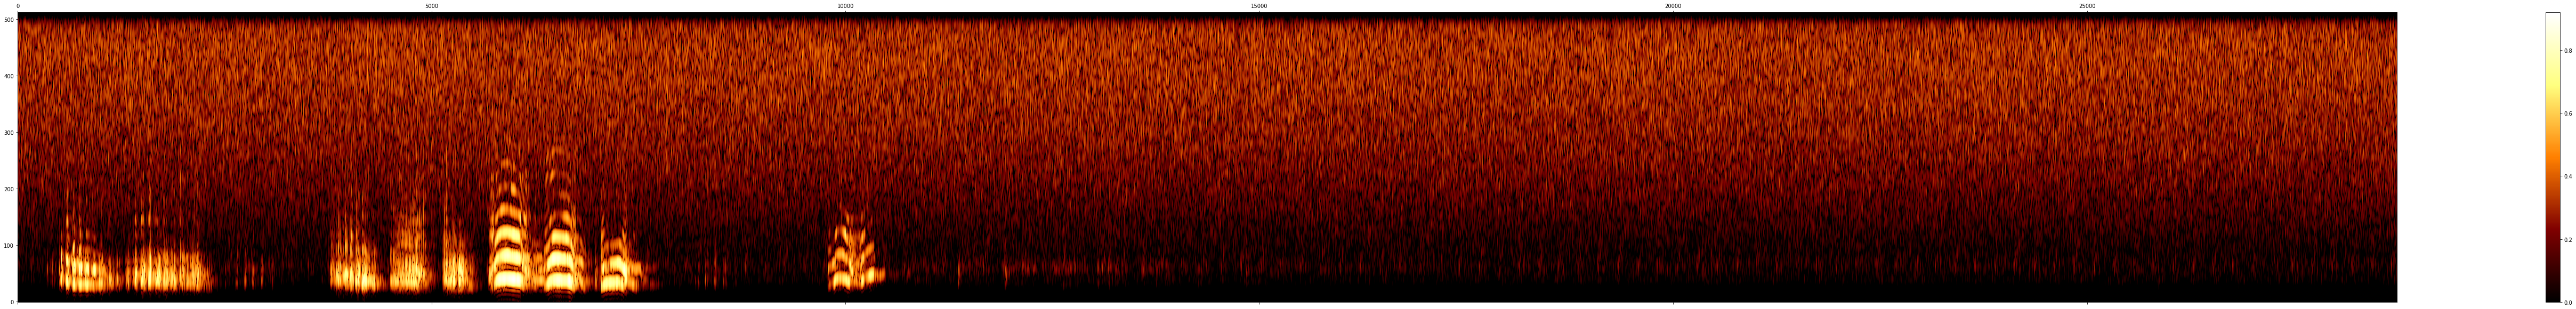

In [106]:
fig, ax = plt.subplots(figsize=(100,10))
plot_spec(spec, fig = fig, ax=ax);

In [27]:
syllable_df = syllable_df[:100]

[autoreload of librosa.beat failed: Traceback (most recent call last):
  File "/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 244, in check
    superreload(m, reload, self.old_objects)
  File "/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 374, in superreload
    module = reload(module)
  File "/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/imp.py", line 315, in reload
    return importlib.reload(module)
  File "/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/importlib/__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 618, in _exec
  File "<frozen importlib._bootstrap_external>", line 678, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/librosa/beat.py", line 21, in <module>
    from .feature im

### Create spectrograms

In [38]:
from avgn.visualization.spectrogram import draw_spec_set
from avgn.signalprocessing.create_spectrogram_dataset import make_spec, mask_spec, log_resize_spec, pad_spectrogram

In [46]:
syllables_wav = syllable_df.audio.values
syllables_rate = syllable_df.rate.values

In [47]:
with Parallel(n_jobs=n_jobs, verbose=verbosity) as parallel:
    # create spectrograms
    syllables_spec = parallel(
        delayed(make_spec)(
            syllable,
            rate,
            hparams=dataset.hparams,
            mel_matrix=dataset.mel_matrix,
            use_mel=True,
            use_tensorflow=False,
        )
        for syllable, rate in tqdm(
            zip(syllables_wav, syllables_rate),
            total=len(syllables_rate),
            desc="getting syllable spectrograms",
            leave=False,
        )
    )

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done  64 out of 100 | elapsed:    9.2s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done  75 out of 100 | elapsed:   10.9s remaining:    3.6s
[Parallel(n_jobs=-1)]: Done  86 out of 100 | elapsed:   11.5s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done  97 out of 100 | elapsed:   12.1s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   13.1s finished


### Rescale spectrogram
- using log rescaling

In [48]:
log_scaling_factor = 20

In [49]:
with Parallel(n_jobs=n_jobs, verbose=verbosity) as parallel:
    syllables_spec = parallel(
        delayed(log_resize_spec)(spec, scaling_factor=log_scaling_factor)
        for spec in tqdm(syllables_spec, desc="scaling spectrograms", leave=False)
    )

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0539s.) Setting batch_size=6.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  20 out of 100 | elapsed:    0.2s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done  31 out of 100 | elapsed:    0.3s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  42 out of 100 | elapsed:    0.4s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.9s finished


(10.0, 10) (320, 320) 10.0 32 320


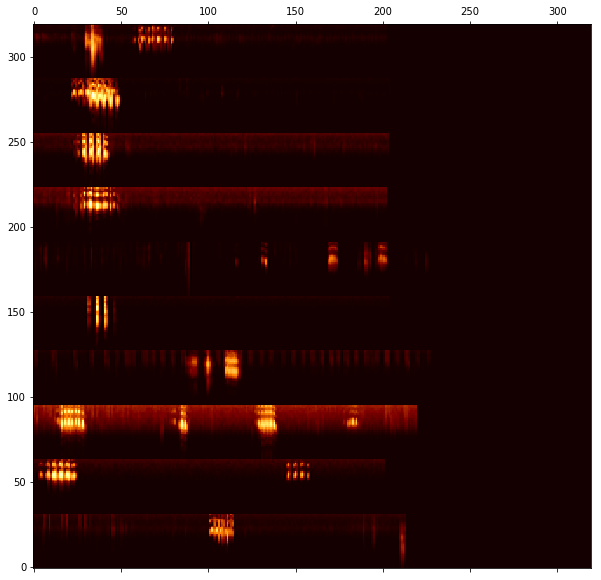

In [50]:
draw_spec_set(syllables_spec, zoom=1, maxrows=10, colsize=10)

### Pad spectrograms

In [ ]:
syll_lens = [np.shape(i)[1] for i in syllables_spec]
pad_length = np.max(syll_lens)

In [ ]:
syllable_df[:3]

In [ ]:
import seaborn as sns

In [ ]:
for indv in np.unique(syllable_df.indv):
    sns.distplot(np.log(syllable_df[syllable_df.indv==indv]["end_time"]), label=indv)
plt.legend()

In [ ]:
with Parallel(n_jobs=n_jobs, verbose=verbosity) as parallel:

    syllables_spec = parallel(
        delayed(pad_spectrogram)(spec, pad_length)
        for spec in tqdm(
            syllables_spec, desc="padding spectrograms", leave=False
        )
    )

In [ ]:
draw_spec_set(syllables_spec, zoom=1, maxrows=10, colsize=25)

In [ ]:
np.shape(syllables_spec)

In [ ]:
syllable_df['spectrogram'] = syllables_spec

In [ ]:
syllable_df[:3]

### view syllables per indv

In [ ]:
syllable_df.indv.unique()

In [ ]:
for indv in np.sort(syllable_df.indv.unique()):
    print(indv, np.sum(syllable_df.indv == indv))
    specs = np.array([i/np.max(i) for i in syllable_df[syllable_df.indv == indv].spectrogram.values])
    specs[specs<0] = 0
    draw_spec_set(specs, zoom=2,
                  maxrows=16, 
                  colsize=25)

### save dataset

In [ ]:
save_loc = DATA_DIR / 'syllable_dfs' / DATASET_ID / 'isolation.pickle'
ensure_dir(save_loc)
syllable_df.to_pickle(save_loc)